# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter
from scipy.stats import shapiro 

dfMerge16 = pd.read_csv("CleanData/Merge-400runsClean-PC16.csv")


dfRead16 = pd.read_csv("CleanData/ReadCSVClean-PC16.csv")

dfMerge16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,8.543701,7.319702,0.505432,1004.640,64.0,best,25000
1,8.301086,7.139343,0.478271,970.802,63.0,best,25000
2,8.312134,7.124695,0.483093,998.576,63.0,best,25000
3,8.493774,7.304321,0.501648,987.148,62.0,best,25000
4,8.501953,7.313782,0.501038,970.400,61.0,best,25000


In [3]:
def calcMean(df,type,size):
    meandf = df[df["Input case"] == type][df["Size"]==size].mean()
    meandf["Input case"] = type
    return meandf

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    l = []
    for case in c:
        for size in s:
            l.append(calcMean(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

dfMergeMean16 = mean_of_dataset(dfMerge16)



dfMergeMean16.head()



<ipython-input-3-69cd3316f86f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,8.5927,7.38346,0.511481,995.586,61.5556,25000,best
1,13.6266,11.6149,0.863065,1637.28,63.5455,50000,best
2,18.4479,15.6576,1.22604,2220.3,63.25,75000,best
3,23.2982,19.694,1.60739,2824.99,63.2333,100000,best
4,43.4894,36.4976,3.25283,5300.37,64.2333,200000,best


In [4]:

def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(calcMean(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans

dfReadMean16 = mean_of_dataset_readCSV(dfRead16)

dfReadMean16.head()


<ipython-input-3-69cd3316f86f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,2.14915,1.87396,0.12836,231.807,53.9737,25000,random1
1,2.51943,2.18513,0.150334,264.781,57,50000,random1
2,3.05994,2.66851,0.178193,304.554,61,75000,random1
3,3.52485,3.07726,0.205626,343.571,63.5278,100000,random1
4,4.16606,3.62685,0.233299,420.754,65.425,200000,random1


In [5]:
dfMergeMean16 = dfMergeMean16.reset_index(drop=True)
dfReadMean16 = dfReadMean16.reset_index(drop=True)

dfMergeMean16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,8.5927,7.38346,0.511481,995.586,61.5556,25000,best
1,13.6266,11.6149,0.863065,1637.28,63.5455,50000,best
2,18.4479,15.6576,1.22604,2220.3,63.25,75000,best
3,23.2982,19.694,1.60739,2824.99,63.2333,100000,best
4,43.4894,36.4976,3.25283,5300.37,64.2333,200000,best


In [6]:
def deductReadFromAlg(meanC, meanR):
    lc = []
    lt = []
    lm = []

    for i in range(len(meanC["Size"])):
        case = meanC["Input case"][i]
        size = meanC["Size"][i]
        if case == "best":
                case2 = "sorted"
        if case == "worst":
            case2 = "mergeworst"
        if case.startswith("random"):
            case2 = "random"+case.split("m")[-1]

        Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
        Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lc.append((Cc-Rc)/400)

        Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
        Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lt.append((Ct-Rt)/400)

        Cm = meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        Rm = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        lm.append((Cm-Rm)/400)

    meanC["CPU - readCSV"] = lc
    meanC["Time - readCSV"] = lt
    meanC["Memory - readCSV"] = lm


deductReadFromAlg(dfMergeMean16,dfReadMean16)



<ipython-input-6-73928b5c4967>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
<ipython-input-6-73928b5c4967>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
<ipython-input-6-73928b5c4967>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
<ipython-input-6-73928b5c4967>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time 

# Shapiro Wilks Test

In [7]:
dfMergeSortBest16 = dfMerge16[dfMerge16["Input case"].str.startswith("best")]
dfMergeSortWorst16 = dfMerge16[dfMerge16["Input case"].str.startswith("worst")]
dfMergeSortRandom16 = dfMerge16[dfMerge16["Input case"].str.startswith("random")]
dfMergeSortRandom1 = dfMerge16[dfMerge16["Input case"].str.endswith("random1")]
dfMergeSortRandom2 = dfMerge16[dfMerge16["Input case"].str.startswith("random2")]
dfMergeSortRandom3 = dfMerge16[dfMerge16["Input case"].str.startswith("random3")]
dfMergeSortRandom4 = dfMerge16[dfMerge16["Input case"].str.startswith("random4")]
dfMergeSortRandom5 = dfMerge16[dfMerge16["Input case"].str.startswith("random5")]
dfMergeSortRandom6 = dfMerge16[dfMerge16["Input case"].str.startswith("random6")]
dfMergeSortRandom7 = dfMerge16[dfMerge16["Input case"].str.startswith("random7")]
dfMergeSortRandom8 = dfMerge16[dfMerge16["Input case"].str.startswith("random8")]
dfMergeSortRandom9 = dfMerge16[dfMerge16["Input case"].str.startswith("random9")]
dfMergeSortRandom10 = dfMerge16[dfMerge16["Input case"].str.startswith("random10")]


print(dfMergeSortBest16)


        PKG (J)     CPU (J)   DRAM (J)  Time (ms)  Temp (C) Input case  \
0      8.543701    7.319702   0.505432   1004.640      64.0       best   
1      8.301086    7.139343   0.478271    970.802      63.0       best   
2      8.312134    7.124695   0.483093    998.576      63.0       best   
3      8.493774    7.304321   0.501648    987.148      62.0       best   
4      8.501953    7.313782   0.501038    970.400      61.0       best   
..          ...         ...        ...        ...       ...        ...   
350  208.115845  173.067139  17.653809  25709.300      68.0       best   
351  208.410522  173.338318  17.647339  25749.400      63.0       best   
352  209.105225  173.813110  17.710938  25916.000      66.0       best   
353  209.274597  173.898132  17.735718  25978.500      63.0       best   
354  209.021057  173.924011  17.659912  25746.500      66.0       best   

        Size  
0      25000  
1      25000  
2      25000  
3      25000  
4      25000  
..       ...  
350  1

In [8]:
data = []
size = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfMergeMean16[dfMergeMean16["Size"]==i]["CPU (J)"]).pvalue:
        data.append(1)
    else:
        data.append(0)
    size.append(i)
    print(shapiro(dfMergeMean16[dfMergeMean16["Size"]==i]["CPU (J)"]).pvalue)
print(data)

6.542381743201986e-05
2.7448802939034067e-05
2.7803325792774558e-05
4.66905657958705e-05
2.592724558780901e-05
1.911731123982463e-05


2.9247437851154245e-05
2.441618198645301e-05
2.575294092821423e-05
2.580329601187259e-05
2.10239268199075e-05
2.360296275583096e-05
2.6871384761761874e-05
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
dataBest = []
sizeBest = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfMergeSortBest16[dfMergeSortBest16["Size"]==i]["CPU (J)"]).pvalue:
        dataBest.append(1)
    else:
        dataBest.append(0)
    sizeBest.append(i)
    print(shapiro(dfMergeSortBest16[dfMergeSortBest16["Size"]==i]["CPU (J)"]).pvalue)
print(dataBest)

0.02785400301218033
0.377338707447052
0.3100185692310333
0.5057286620140076
0.3550143837928772
0.046356745064258575
0.017209040001034737
0.28425148129463196
0.9258238077163696
0.3138777017593384
0.29810822010040283
0.2148781716823578
0.22961750626564026
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1]


In [10]:
data2 = []
size2 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfMergeSortWorst16[dfMergeSortWorst16["Size"]==i]["CPU (J)"]).pvalue:
        data2.append(1)
    else:
        data2.append(0)
    size2.append(i)
    print(shapiro(dfMergeSortWorst16[dfMergeSortWorst16["Size"]==i]["CPU (J)"]).pvalue)
print(data2)

0.8175856471061707
0.007321147248148918
0.4363113045692444
0.5252784490585327
0.5608131289482117
0.15774917602539062
0.07174211740493774
0.0028398733120411634
0.2429305613040924
0.17438054084777832
0.24171732366085052
0.38993868231773376
0.7804232835769653
[1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


In [11]:
data3 = []
size3 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfMergeSortRandom16[dfMergeSortRandom16["Size"]==i]["CPU (J)"]).pvalue:
        data3.append(1)
    else:
        data3.append(0)
    size3.append(i)
    print(shapiro(dfMergeSortRandom16[dfMergeSortRandom16["Size"]==i]["CPU (J)"]).pvalue)
print(data3)
#make for each random 

0.009733965620398521
0.09020685404539108
0.34720438718795776
0.0001767556241247803
0.0006491682142950594
6.3155107810075606e-09
9.737329673953354e-05
0.00047675444511696696
0.00029996520606800914
2.2558670309535955e-07
0.0001643199793761596
5.324820904206717e-07
4.936126742904889e-07
[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
dataRandom1 = []
sizeRandom1 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfMergeSortRandom1[dfMergeSortRandom1["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom1.append(1)
    else:
        dataRandom1.append(0)
    sizeRandom1.append(i)
    print(shapiro(dfMergeSortRandom1[dfMergeSortRandom1["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom1)


0.34467244148254395
0.061782918870449066
0.5463182926177979
0.9654688835144043
0.6062363386154175
0.3307318091392517
0.22573019564151764
0.5737915635108948
0.13692158460617065
0.008128378540277481
0.11271927505731583
0.06055348739027977
0.8204988241195679
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]


In [13]:
dataRandom2 = []
sizeRandom2 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfMergeSortRandom2[dfMergeSortRandom2["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom2.append(1)
    else:
        dataRandom2.append(0)
    sizeRandom2.append(i)
    print(shapiro(dfMergeSortRandom2[dfMergeSortRandom2["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom2)

0.39557671546936035
0.5919594168663025
0.33906418085098267
0.16369979083538055
0.4110327363014221
0.26940014958381653
0.9016250967979431
0.814214825630188
0.4312787652015686
0.9115609526634216
0.03011179342865944
0.0013373508118093014
0.5179447531700134
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]


In [14]:
dataRandom3 = []
sizeRandom3 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfMergeSortRandom3[dfMergeSortRandom3["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom3.append(1)
    else:
        dataRandom3.append(0)
    sizeRandom3.append(i)
    print(shapiro(dfMergeSortRandom3[dfMergeSortRandom3["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom3)

0.03371767699718475
0.3961124122142792
0.1568131446838379
0.03404119983315468
0.05875077098608017
0.7583418488502502
0.1298946887254715
0.7013111710548401
0.8639441132545471
0.21062181890010834
0.11621905863285065
0.1078038141131401
0.7980441451072693
[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [15]:
dataRandom4 = []
sizeRandom4 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfMergeSortRandom4[dfMergeSortRandom4["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom4.append(1)
    else:
        dataRandom4.append(0)
    sizeRandom4.append(i)
    print(shapiro(dfMergeSortRandom4[dfMergeSortRandom4["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom4)

0.3529811501502991
0.166574165225029
0.8171971440315247
0.4505314826965332
0.7365840673446655
0.5318218469619751
0.022952163591980934
0.25316205620765686
0.4734073877334595
0.0013246011221781373
0.33568641543388367
0.5130420327186584
0.05215827375650406
[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1]


In [16]:
dataRandom5 = []
sizeRandom5 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfMergeSortRandom5[dfMergeSortRandom5["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom5.append(1)
    else:
        dataRandom5.append(0)
    sizeRandom5.append(i)
    print(shapiro(dfMergeSortRandom5[dfMergeSortRandom5["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom5)

0.3051377236843109
0.6138588190078735
0.6862027645111084
0.4293556213378906
0.21081921458244324
0.00807920191437006
0.42166051268577576
0.26327893137931824
0.2625606060028076
0.7857748866081238
0.22065286338329315
0.5400167107582092
0.9477994441986084
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]


In [17]:
dataRandom6 = []
sizeRandom6 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfMergeSortRandom6[dfMergeSortRandom6["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom6.append(1)
    else:
        dataRandom6.append(0)
    sizeRandom6.append(i)
    print(shapiro(dfMergeSortRandom6[dfMergeSortRandom6["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom6)

0.4648077189922333
0.43591898679733276
0.7653974294662476
0.6518433094024658
0.3644624650478363
0.8522672057151794
0.4469793438911438
0.7371211647987366
0.0999133512377739
0.03390300273895264
0.611962080001831
0.8597280383110046
0.20047876238822937
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]


In [18]:
dataRandom7 = []
sizeRandom7 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfMergeSortRandom7[dfMergeSortRandom7["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom7.append(1)
    else:
        dataRandom7.append(0)
    sizeRandom7.append(i)
    print(shapiro(dfMergeSortRandom7[dfMergeSortRandom7["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom7)

0.24190931022167206
0.5932052135467529
0.7989434599876404
0.7813555002212524
0.7088598608970642
0.4359802305698395
0.02527579292654991
0.12185874581336975
0.5210465788841248
0.0379130057990551
0.5369600057601929
0.3655106723308563
0.32696473598480225
[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1]


In [19]:
dataRandom8 = []
sizeRandom8 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfMergeSortRandom8[dfMergeSortRandom8["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom8.append(1)
    else:
        dataRandom8.append(0)
    sizeRandom8.append(i)
    print(shapiro(dfMergeSortRandom8[dfMergeSortRandom8["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom8)

0.8503003120422363
0.5859135389328003
0.8003076910972595
0.8315616846084595
0.060579895973205566
0.6936096549034119
0.2643449008464813
0.9553377032279968
0.037230897694826126
0.039541322737932205
0.12895166873931885
0.1745361089706421
0.07749326527118683
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1]


In [20]:
dataRandom9 = []
sizeRandom9 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfMergeSortRandom9[dfMergeSortRandom9["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom9.append(1)
    else:
        dataRandom9.append(0)
    sizeRandom9.append(i)
    print(shapiro(dfMergeSortRandom9[dfMergeSortRandom9["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom9)

0.5441107749938965
0.19046707451343536
0.16318388283252716
0.24676421284675598
0.2439189851284027
0.13460160791873932
0.2752326726913452
0.1448969691991806
0.5078939199447632
0.35752367973327637
0.18448564410209656
0.13131332397460938
0.9058226943016052
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [21]:
dataRandom10 = []
sizeRandom10 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfMergeSortRandom10[dfMergeSortRandom10["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom10.append(1)
    else:
        dataRandom10.append(0)
    sizeRandom10.append(i)
    print(shapiro(dfMergeSortRandom10[dfMergeSortRandom10["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom10)

0.2580253779888153
0.3669620752334595
0.6043224930763245
0.07451324909925461
0.06809287518262863
0.5001773834228516
0.47645819187164307
0.5749356150627136
0.23496665060520172
0.3965033292770386
0.02258128486573696
0.04656616970896721
0.1271357536315918
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]


# PLOTS

In [22]:
# For bubblesort: polynomial regression
#!!!!MAKE HOLLOW IN THIS CELL!!!!!
#THIS IS WHERE PLOT SETTING ARE DEFINIED!!!!
def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, regLine=True, printR2Score = True, plotGraph = True, dots="o"):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.plot(X, y,dots, color=color,markersize=10, markerfacecolor = "none")    #!!!!MAKE HOLLOW HERE!!!!! 
        if r2 > 0.5 and regLine:
            plt.plot(X, y_poly, color=color, linewidth=2)
        #plt.legend(loc='upper left')
    print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))

In [23]:
def getIndex(df,case,size):
    return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


In [24]:
import math
def calcPercent(df):
    cpuPercent = []
    pkgPercent = []
    fullEC = []
    nlogn = []
    for case in ["best", "worst", "random"]:
        if case != "random":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                cpuPercent.append(df["CPU (J)"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
                nlogn.append(df["Size"][getIndex(df,case,size)] * math.log2(df["Size"][getIndex(df,case,size)]))
        else :
            for i in range(1,11):
                for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                    cpuPercent.append(df["CPU (J)"][getIndex(df,case+str(i),size)] / df["PKG (J)"][getIndex(df,case+str(i),size)] * 100)
                    pkgPercent.append(100)
                    fullEC.append(df["CPU - readCSV"][getIndex(df,case+str(i),size)]+df["Memory - readCSV"][getIndex(df,case+str(i),size)])
                    nlogn.append(df["Size"][getIndex(df,case+str(i),size)] * math.log2(df["Size"][getIndex(df,case+str(i),size)]))

    df["CPU % of PKG"] = cpuPercent
    df["PKG %"] = pkgPercent
    df["full EC"] = fullEC
    df["nlog(n)"] = nlogn
calcPercent(dfMergeMean16)


dfMergeMean16.head()

<ipython-input-23-565db17a79a7>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC,nlog(n)
0,8.5927,7.38346,0.511481,995.586,61.5556,25000,best,0.014246,1.970851,0.000994,85.927173,100,0.015240,3.652410e+05
1,13.6266,11.6149,0.863065,1637.28,63.5455,50000,best,0.023702,3.477878,0.001802,85.236888,100,0.025504,7.804820e+05
2,18.4479,15.6576,1.22604,2220.3,63.25,75000,best,0.032756,4.839167,0.002638,84.874402,100,0.035394,1.214595e+06
3,23.2982,19.694,1.60739,2824.99,63.2333,100000,best,0.042071,6.276871,0.003547,84.530260,100,0.045618,1.660964e+06
4,43.4894,36.4976,3.25283,5300.37,64.2333,200000,best,0.082144,12.257489,0.007564,83.923116,100,0.089708,3.521928e+06


-2.1256834985006066 [0.        0.0001884]
-2.7214322809959555 [0.         0.00019059]
-2.018559750681831 [0.         0.00018727]
-2.3419033526543984 [0.         0.00018969]
-2.6727209214598275 [0.        0.0001911]
-2.011303408989235 [0.         0.00018948]
-2.1052164565335687 [0.         0.00018862]
-2.372608496033095 [0.         0.00019048]
-1.7931924778208383 [0.         0.00018809]
-2.1855649355677826 [0.         0.00018956]
0.04993981265281988 [0.00000000e+00 6.17349585e-05]
0.25823059267815296 [0.00000000e+00 8.57485026e-05]


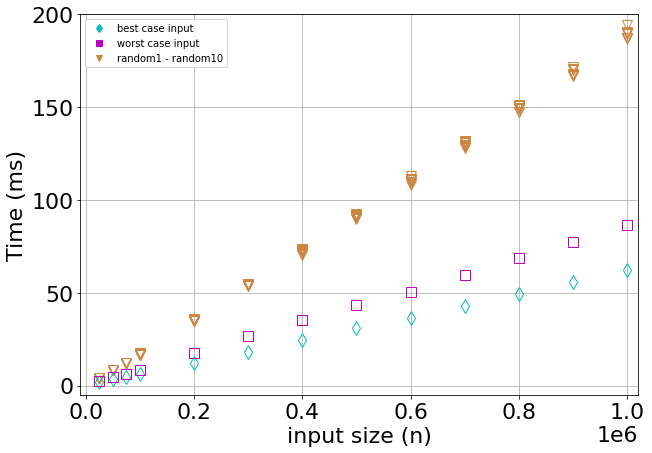

In [34]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []
plt.plot(-1000000,0,"d", color="c",label="best case input")
plt.plot(-1000000,0,"s", color="m",label="worst case input")
plt.plot(-1000000,0,"v", color="peru",label="random1 - random10")

for i in range(1,11):
    Rs.append(polyReg(dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["Size"], dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "peru",dots="v",regLine=False))
best = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Size"], dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "c",dots="d",regLine=False)
worst = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["Size"], dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "m",dots="s",regLine=False)

#print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")
#for i in range(len(Rs)):
 #   print(f"random{i} R2", Rs[i][1], " \n")

#plt.title("Merge sort wall time vs input size.")
plt.xlabel("input size (n)", fontsize = 22)
plt.ylabel("Time (ms)", fontsize = 22)
plt.rc('xtick', labelsize= 22) 
plt.rc('ytick', labelsize= 22) 
plt.xlim(-10000, 1020000)
plt.ylim(-5, 200)
plt.grid()
plt.legend()
plt.show()


# Time v big-o

1.457625989776517 [0.00000000e+00 9.38629715e-06]
0.8769830651262254 [0.00000000e+00 9.49875609e-06]
1.5354539045445676 [0.00000000e+00 9.33096627e-06]
1.2532313406241968 [0.00000000e+00 9.45235561e-06]
0.9382954590810755 [0.00000000e+00 9.52367881e-06]
1.593528785454879 [0.00000000e+00 9.44011615e-06]
1.4813483016718436 [0.00000000e+00 9.39779057e-06]
1.2399206411219694 [0.00000000e+00 9.49116201e-06]
1.787997175963298 [0.00000000e+00 9.37056726e-06]
1.4172544970322178 [0.0000000e+00 9.4445568e-06]
1.8988695672840024 [0.00000000e+00 4.27100148e-06]
1.2216359663578125 [0.0000000e+00 3.0760611e-06]


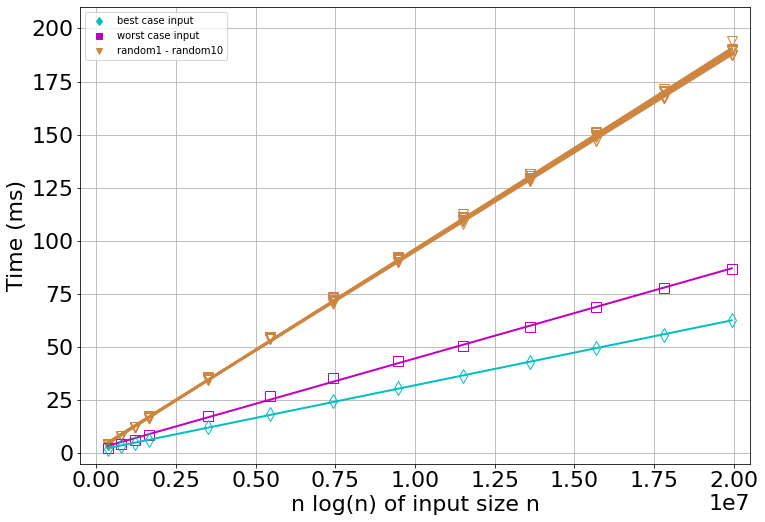

In [38]:
plt.figure(figsize=(10*1.2,7*1.2))
color = "red"

Rs = []
plt.plot(-10000,-10000,"d", color="c",label="best case input")
plt.plot(-10000,-10000,"s", color="m",label="worst case input")
plt.plot(-10000,-10000,"v", color="peru",label="random1 - random10")

for i in range(1,11):
    Rs.append(polyReg(dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["nlog(n)"], dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "peru",dots="v"))
worst = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["nlog(n)"], dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "m",dots="s",regLine=True)
best = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "best"]["nlog(n)"], dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "c",dots="d",regLine=True)

#for i in range(len(Rs)):
    #print(f"random{i} R2", Rs[i][1], " \n")
#print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")

#plt.title("Merge sort wall time vs input size, with linear regression.")
plt.xlabel("n log(n) of input size n", fontsize = 22)
plt.ylabel("Time (ms)", fontsize = 22)
plt.rc('xtick', labelsize= 22) 
plt.rc('ytick', labelsize= 22) 
plt.xlim(-500000, 20500000)
plt.ylim(-5, 210)
plt.grid()
plt.legend()
plt.show()


# EC v Time

0.0001277969376041188 [0.         0.00664063]
-0.00020426659579031448 [0.         0.00664228]
-0.0012889952622699985 [0.         0.00667521]
-2.061044694279257e-05 [0.         0.00664701]
-0.0003506573877019026 [0.         0.00664439]
-0.0005488147082772787 [0.        0.0066515]
-0.0008851946879911976 [0.         0.00666586]
-0.0002894481133792759 [0.        0.0066386]
-0.0006439269838900419 [0.         0.00665319]
9.419911780161883e-06 [0.        0.0066325]
-0.002712860192803146 [0.         0.00746632]
-0.0007218841111540086 [0.        0.0073961]


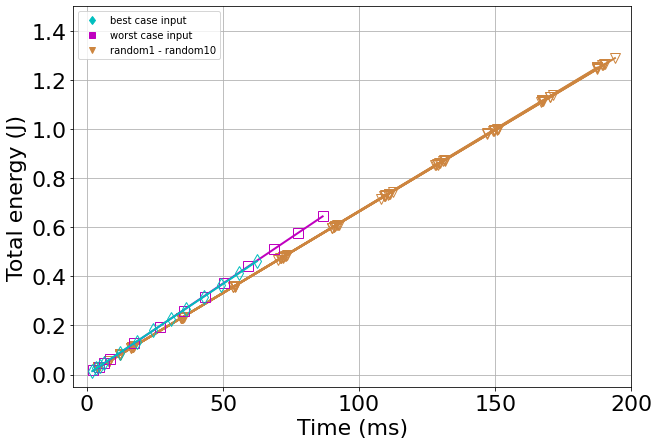

In [40]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []
plt.plot(-100,0,"d", color="c",label="best case input")
plt.plot(-100,0,"s", color="m",label="worst case input")
plt.plot(-100,0,"v", color="peru",label="random1 - random10")

for i in range(1,11):
    Rs.append(polyReg(dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "peru",dots="v"))
worst = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["Time - readCSV"], dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "m",dots="s")
best = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Time - readCSV"], dfMergeMean16[dfMergeMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "c",dots="d")


#print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")
#for i in range(len(Rs)):
    #print(f"random{i} R2", Rs[i][1], " \n")

##plt.title("Merge sort energy consumption vs wall time, with linear regression.")
plt.ylabel("Total energy (J)", fontsize = 22)
plt.xlabel("Time (ms)", fontsize = 22)
plt.rc('xtick', labelsize= 22) 
plt.rc('ytick', labelsize= 22) 
plt.xlim(-5, 200)
plt.ylim(-0.05, 1.5)
plt.legend()
plt.grid()
plt.show()


-0.0007218841111540086 [0.        0.0073961]
-0.002712860192803146 [0.         0.00746632]


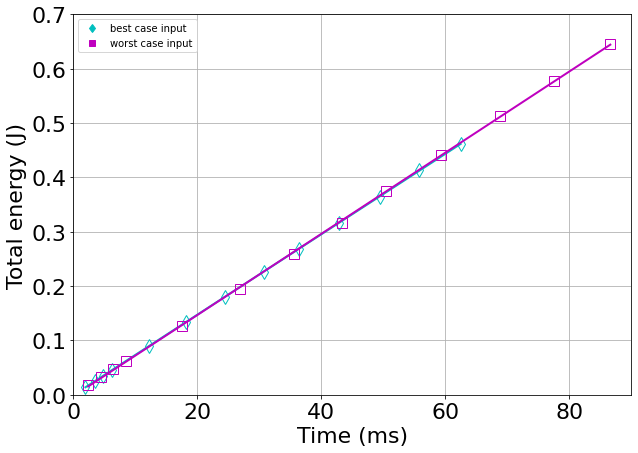

In [48]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

plt.plot(-100,0,"d", color="c",label="best case input")
plt.plot(-100,0,"s", color="m",label="worst case input")

best = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Time - readCSV"], dfMergeMean16[dfMergeMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "c",dots="d")
worst = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["Time - readCSV"], dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "m",dots="s")

#print(f"best R2 ", best[1], "\n")
#print(f"worst R2 ", worst[1], "\n")

#plt.title("Merge sort energy consumption vs wall time, with linear regression.")
plt.ylabel("Total energy (J)", fontsize = 22)
plt.xlabel("Time (ms)", fontsize = 22)
plt.rc('xtick', labelsize= 22) 
plt.rc('ytick', labelsize= 22)
plt.xlim(0, 90)
plt.ylim(0, 0.7)
plt.legend()
plt.grid()
plt.show()


# EC v big-oh

-0.013993413152183276 [0.0000000e+00 1.2510836e-06]
-0.018274637669291605 [0.00000000e+00 1.26593525e-06]
-0.014728916316847585 [0.00000000e+00 1.24996779e-06]
-0.01559089157082405 [0.00000000e+00 1.26089054e-06]
-0.01811205971181551 [0.00000000e+00 1.26973032e-06]
-0.013905845369834413 [0.00000000e+00 1.26027117e-06]
-0.01490719122192019 [0.00000000e+00 1.25732018e-06]
-0.016017672659521587 [0.00000000e+00 1.26444471e-06]
-0.012568053141288171 [0.0000000e+00 1.2513828e-06]
-0.01446913656043991 [0.00000000e+00 1.25721375e-06]
-0.0008215844272569384 [0.00000000e+00 6.40309978e-07]
-0.0003397068294931638 [0.00000000e+00 4.56568693e-07]


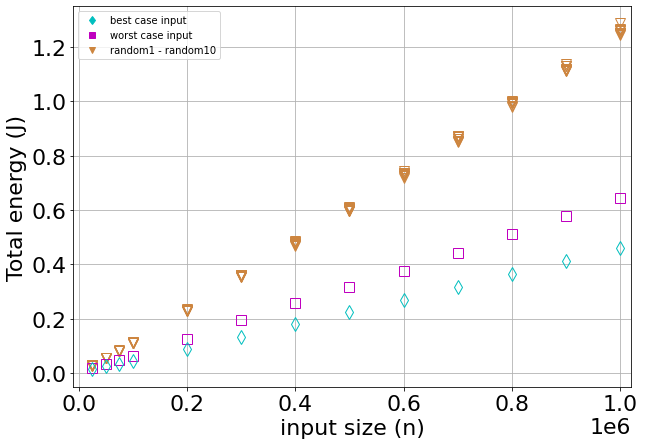

In [46]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []
plt.plot(-10000,-10000,"d", color="c",label="best case input")
plt.plot(-10000,-10000,"s", color="m",label="worst case input")
plt.plot(-10000,-10000,"v", color="peru",label="random1 - random10")

for i in range(1,11):
    Rs.append(polyReg(dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["Size"], dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "peru", dots="v",regLine=False))
worst = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["Size"], dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "m",dots="s",regLine=False)
best = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Size"], dfMergeMean16[dfMergeMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "c",dots="d",regLine=False)

#print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")
#for i in range(len(Rs)):
    #print(f"random{i} R2", Rs[i][1], " \n")

#plt.title("Merge sort energy consumption vs input size.")
plt.xlabel("input size (n)", fontsize = 22)
plt.ylabel("Total energy (J)", fontsize = 22)
plt.rc('xtick', labelsize= 22) 
plt.rc('ytick', labelsize= 22)
plt.grid()
plt.xlim(-10000,1020000)
plt.ylim(-0.05,1.35)
plt.legend()
plt.show()

0.009759880365069029 [0.00000000e+00 6.23365996e-08]
0.0056070381889878895 [0.00000000e+00 6.30950126e-08]
0.008931582500143143 [0.00000000e+00 6.22895879e-08]
0.008274187978493441 [0.00000000e+00 6.28341614e-08]
0.005834065023914925 [0.00000000e+00 6.32850174e-08]
0.010020655688260605 [0.0000000e+00 6.2794528e-08]
0.008938143307566704 [0.00000000e+00 6.26505054e-08]
0.007918896189470503 [0.00000000e+00 6.30107714e-08]
0.011192816724587384 [0.00000000e+00 6.23512806e-08]
0.009371867429417202 [0.00000000e+00 6.26454791e-08]
0.008303420893563451 [0.00000000e+00 2.27520721e-08]
0.011370264922480444 [0.00000000e+00 3.18999672e-08]


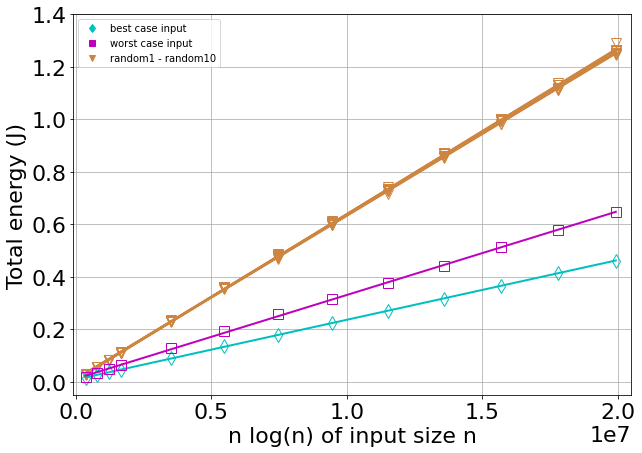

In [47]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []
plt.plot(-10000,-10000,"d", color="c",label="best case input")
plt.plot(-10000,-10000,"s", color="m",label="worst case input")
plt.plot(-10000,-10000,"v", color="peru",label="random1 - random10")

for i in range(1,11):
    Rs.append(polyReg(dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["nlog(n)"], dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "peru",dots="v"))

best = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "best"]["nlog(n)"], dfMergeMean16[dfMergeMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "c",dots="d",regLine=True)
worst = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["nlog(n)"], dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "m",dots="s",regLine=True)

#for i in range(len(Rs)):
 #   print(f"random{i} R2", Rs[i][1], " \n")
#print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")
#plt.title("Merge sort energy consumption vs n log(n) of input size n, with linear regression.")

plt.xlabel("n log(n) of input size n", fontsize = 22)
plt.ylabel("Total energy (J)", fontsize = 22)
plt.rc('xtick', labelsize= 22) 
plt.rc('ytick', labelsize= 22)
plt.xlim(-100000, 20500000)
plt.ylim(-0.05, 1.4)
plt.grid()
plt.legend()
plt.show()